<a href="https://colab.research.google.com/github/wayaadhyasta/DemoModel_DatasetKorupsi_MachineLearning/blob/main/datasetKorupsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
dt = pd.read_csv('/content/drive/MyDrive/dataset_korupsi_indonesia_final.csv')
dt

,ID Kasus,Nama Tersangka,Jabatan,Institusi,Tahun Kasus,Nilai Korupsi (IDR),Status Hukum
0,1,Ahmad Fikri,Walikota,Pemerintah Kota Bandung,2021,5000000000,Divonis
1,2,Budi Santoso,Direktur Utama,BUMN Konstruksi,2020,7500000000,Tersangka
2,3,Citra Dewi,Anggota DPR,DPR RI,2019,12000000000,Divonis
3,4,Dedy Prasetyo,Kepala Dinas,Dinas Pendidikan Jakarta,2022,3000000000,Tersangka
4,5,Eka Sari,Gubernur,Provinsi Sumatera Utara,2023,10000000000,Divonis
5,6,Fajar Hidayat,Bupati,Kabupaten Bogor,2018,2500000000,Bebas
6,7,Gita Rahma,Sekretaris Daerah,Provinsi Jawa Tengah,2021,6000000000,Divonis
7,8,Hendra Kusuma,Direktur Keuangan,BUMD Jakarta,2020,4500000000,Tersangka
8,9,Indra Kurniawan,Ketua Partai,Partai Politik Nasional,2017,15000000000,Divonis
9,10,Joko Susilo,Walikota,Pemerintah Kota Surabaya,2019,8000000000,Divonis


In [ ]:
le = LabelEncoder()
dt['Status Hukum'] = le.fit_transform(dt['Status Hukum'])
dt['Jabatan'] = le.fit_transform(dt['Jabatan'])
dt['Institusi'] = le.fit_transform(dt['Institusi'])

In [ ]:
x = dt[['Jabatan', 'Institusi','Tahun Kasus','Nilai Korupsi (IDR)']]
y = dt[['Status Hukum']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
lf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.67      0.67      0.67         3

Accuracy Score: 0.6666666666666666


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Prec

In [ ]:
print('Data Overview: \n', dt.info())
print('\nNull Values: \n', dt.isnull().sum())
print('\nDescriptive Statistics:\n', dt.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID Kasus             15 non-null     int64 
 1   Nama Tersangka       15 non-null     object
 2   Jabatan              15 non-null     int64 
 3   Institusi            15 non-null     int64 
 4   Tahun Kasus          15 non-null     int64 
 5   Nilai Korupsi (IDR)  15 non-null     int64 
 6   Status Hukum         15 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 972.0+ bytes
Data Overview: 
 None

Null Values: 
 ID Kasus               0
Nama Tersangka         0
Jabatan                0
Institusi              0
Tahun Kasus            0
Nilai Korupsi (IDR)    0
Status Hukum           0
dtype: int64

Descriptive Statistics:
         ID Kasus    Jabatan  Institusi  Tahun Kasus  Nilai Korupsi (IDR)  Status Hukum
count  15.000000  15.000000  15.000000    15.000000         1.5

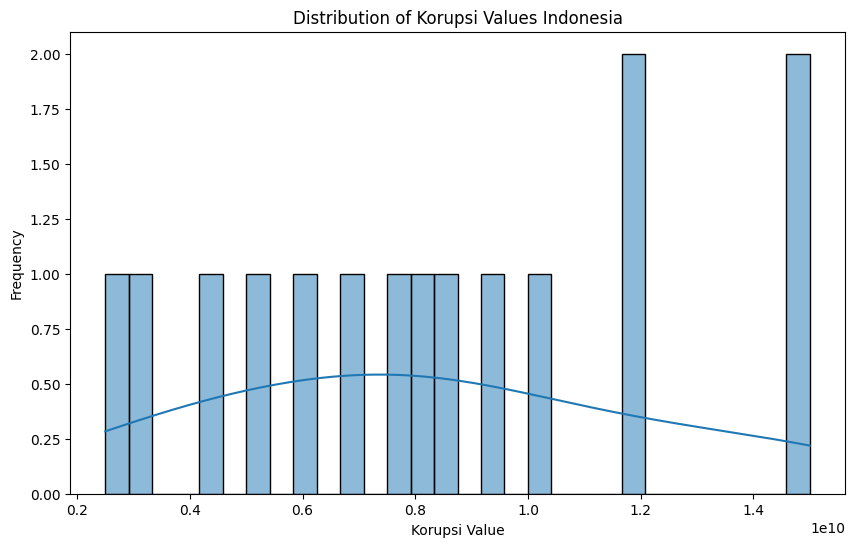

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dt['Nilai Korupsi (IDR)'], bins=30, kde=True)
plt.title('Distribution of Korupsi Values Indonesia')
plt.xlabel('Korupsi Value')
plt.ylabel('Frequency')
plt.show()

<ipython-input-70-59b5f9f9ea80>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt, x='Tahun Kasus', palette='coolwarm')


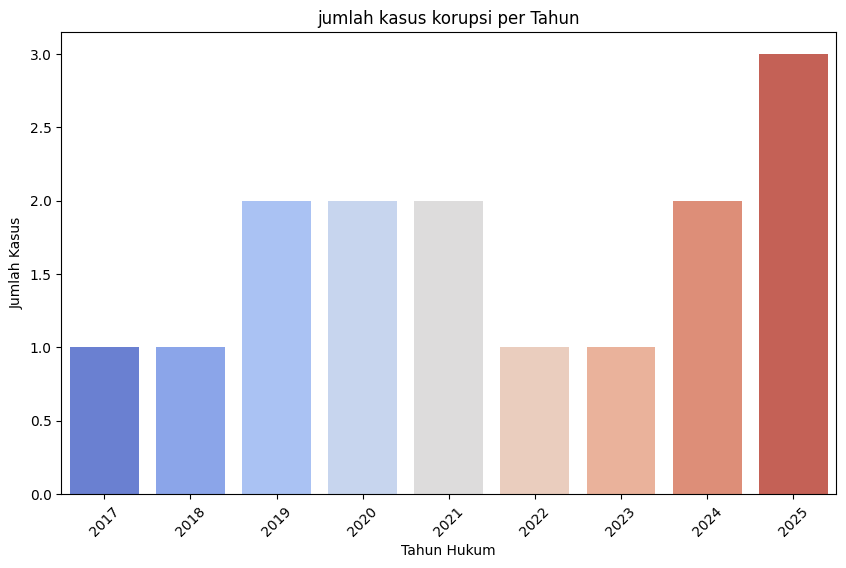

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dt, x='Tahun Kasus', palette='coolwarm')
plt.title('jumlah kasus korupsi per Tahun')
plt.xlabel('Tahun Hukum')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_korupsi = dt.nlargest(10, 'Nilai Korupsi (IDR)')
print('Top 10 Kasus Korupsi Terbesar:\n', top_korupsi[['Institusi','Nilai Korupsi (IDR)','Tahun Kasus']])

Top 10 Kasus Korupsi Terbesar:
     Institusi  Nilai Korupsi (IDR)  Tahun Kasus
8           8          15000000000         2017
12          7          15000000000         2025
2           3          12000000000         2019
14         11          12000000000         2025
4          13          10000000000         2023
11          1           9200000000         2024
10          6           8500000000         2024
9          10           8000000000         2019
1           2           7500000000         2020
13          4           6700000000         2025


<function matplotlib.pyplot.show(close=None, block=None)>

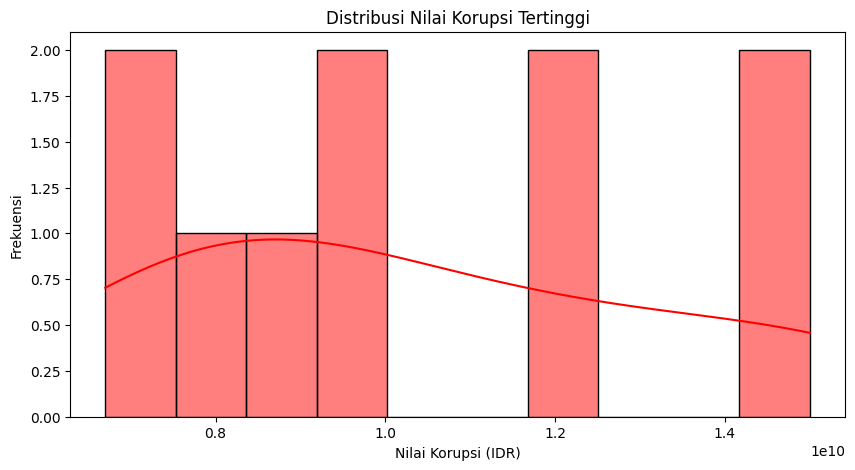

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(top_korupsi['Nilai Korupsi (IDR)'], bins=10, kde=True, color='red')
plt.title("Distribusi Nilai Korupsi Tertinggi")
plt.xlabel("Nilai Korupsi (IDR)")
plt.ylabel("Frekuensi")
plt.show

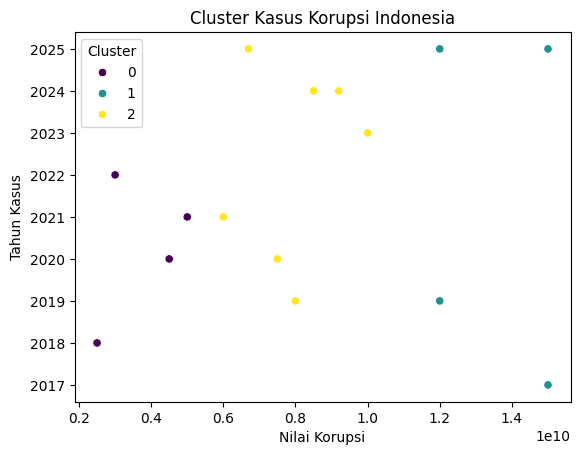

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
dt['Cluster'] = kmeans.fit_predict(x)
# sns.scatterplot(x=dt['Nilai Korupsi (IDR)'], y=['Tahun Kasus'], hue=['Cluster'], pelette='viridis')
sns.scatterplot(data=dt, x='Nilai Korupsi (IDR)', y='Tahun Kasus', hue='Cluster', palette='viridis') # Added data=dt
plt.title('Cluster Kasus Korupsi Indonesia')
plt.xlabel('Nilai Korupsi')
plt.ylabel('Tahun Kasus')
plt.show()

In [ ]:
!pip install LinearRegression

In [ ]:
x_reg = dt[['Jabatan', 'Institusi', 'Tahun Kasus']]
y_reg = dt['Nilai Korupsi (IDR)']
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(x_train_reg, y_train_reg)
y_pred_reg = reg.predict(x_test_reg)
print('Regresi Score:', reg.score(x_train_reg, y_train_reg))
print('Mean Absolute Error:', mean_absolute_error(y_test_reg, y_pred_reg))
print('Mean Squared Error:', mean_squared_error(y_test_reg, y_pred_reg))

Regresi Score: 0.10345035129648017
Mean Absolute Error: 2957407147.2931113
Mean Squared Error: 1.0481223184087702e+19


Anomalies:
    ID Kasus   Nama Tersangka  Jabatan  ...  Status Hukum  Cluster  Anomaly
2         3       Citra Dewi        0  ...             1        1       -1
8         9  Indra Kurniawan        7  ...             1        1       -1

[2 rows x 9 columns]


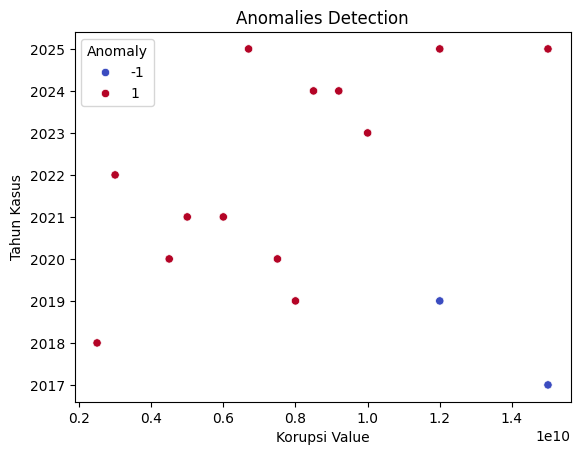

In [ ]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
dt['Anomaly'] = iso_forest.fit_predict(x)
anomalies = dt[dt['Anomaly'] ==-1 ]
print('Anomalies:\n', anomalies)
sns.scatterplot(x=dt['Nilai Korupsi (IDR)'], y=dt['Tahun Kasus'], hue=dt['Anomaly'], palette='coolwarm')
plt.title('Anomalies Detection')
plt.xlabel('Korupsi Value')
plt.ylabel('Tahun Kasus')
plt.show()

In [ ]:
text_data = ["Kasus korupsi besar ditemukan di Jakarta", "Politikus terlibat dalam kasus suap", "Laporan keuangan menunjukkan indikasi korupsi", "Pemerintah mengumumkan kebijakan baru"]
labels = [1, 1, 0, 0]  # 1: Berita korupsi, 0: Bukan
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(text_data)
nb = MultinomialNB()
nb.fit(X_text, labels)
prediction = nb.predict(vectorizer.transform(["Dana bansos diselewengkan oleh pejabat"]))
print("Prediksi Berita Korupsi:", "Korupsi" if prediction[0] == 1 else "Bukan Korupsi")

Prediksi Berita Korupsi: Bukan Korupsi
